In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import glob

# Import data

In [2]:
relative_path_to_twitter_data_cleaned = '../../../../'

In [3]:
path = relative_path_to_twitter_data_cleaned + 'twitter_data_cleaned'

In [4]:
all_files = glob.glob(path + "/*.csv")
print(all_files)

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None,dtype=str, header=0)
    df['comapany'] = filename[107:-19]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['../../../../twitter_data_cleaned/4_plug_power_tweets_cleaned.csv', '../../../../twitter_data_cleaned/6_sunrun_tweets_cleaned.csv', '../../../../twitter_data_cleaned/7_sunpower_tweets_cleaned.csv', '../../../../twitter_data_cleaned/8_meridian_energy_tweets_cleaned.csv', '../../../../twitter_data_cleaned/1_enphase_energy_tweets_cleaned.csv', '../../../../twitter_data_cleaned/3_siemens_gamesa_tweets_cleaned_05_03.csv', '../../../../twitter_data_cleaned/5_tesla_tweets_cleaned.csv', '../../../../twitter_data_cleaned/2_first_solar_tweets_cleaned.csv']
../../../../twitter_data_cleaned/4_plug_power_tweets_cleaned.csv
../../../../twitter_data_cleaned/6_sunrun_tweets_cleaned.csv
../../../../twitter_data_cleaned/7_sunpower_tweets_cleaned.csv
../../../../twitter_data_cleaned/8_meridian_energy_tweets_cleaned.csv
../../../../twitter_data_cleaned/1_enphase_energy_tweets_cleaned.csv
../../../../twitter_data_cleaned/3_siemens_gamesa_tweets_cleaned_05_03.csv
../../../../twitter_data_cleaned/5_tesla_tw

In [5]:
test = frame    #.head(10000)
print(test.shape, frame.shape)

(916946, 10) (916946, 10)


In [6]:
import re
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    s = s.replace("[", "").replace("]", "").replace("'", "").split(",")
    #print(s)
    for ele in s:
        ele = ele.replace(" ", "")
        
        if(ele.startswith('http')==False ):
            #print("l",ele)
            #print(re.search("http", ele) )
            if(re.search("http", ele)==None ):
                str1 += ele  
                str1+=" "
    
    return str1 
        
        
# Driver code    
s = ['Geeks', 'for', 'Geeks']
print(listToString("['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', 'fslr', 'httpstcojlkofos', 'kkkioiijbhttpstcojlkofos']")) 


first solar completes sale north american oampm business novasource fslr 


In [7]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

nested_list = [[1, 2, 3, 4], [5, 6, 7], [8, 9, 10]]
print('Original List', nested_list)
print('Transformed Flat List', flatten_list(nested_list))

Original List [[1, 2, 3, 4], [5, 6, 7], [8, 9, 10]]
Transformed Flat List [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [8]:
name_list = test['comapany'].unique()
print(name_list)

['']


In [9]:
#For every company perform tfidf and append in one single dataframe
list_tfidf =[]
for name in name_list:
    tfidf_input = test[( test['comapany'] == name )]['Tweet_lemmatized'].apply(listToString).tolist()
    tfIdfVectorizer=TfidfVectorizer(use_idf=True)
    tfIdf = tfIdfVectorizer.fit_transform(tfidf_input)
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF', ascending=False)
    df['company'] = name
    df['word'] = df.index
    list_tfidf.append(df[:25])
    #print (df.head(25)) 

In [10]:
#merge tfidf results into single dataframe from list
res = pd.concat(list_tfidf, axis=0, ignore_index=True)
print(res)

      TF-IDF company        word
0   0.403571          freeloader
1   0.403571           retrained
2   0.326877          unemployed
3   0.300955              woohoo
4   0.292904              employ
5   0.253488             charger
6   0.214019               biden
7   0.211405                used
8   0.208118                 tax
9   0.198963             install
10  0.198456              credit
11  0.182950              buying
12  0.179365           announces
13  0.129966               tesla
14  0.115842                 new
15  0.111512                tsla
16  0.074986                plug
17  0.000000               psptm
18  0.000000                 pso
19  0.000000               psrla
20  0.000000               psrsm
21  0.000000           psomasfmg
22  0.000000               psoda
23  0.000000                psnx
24  0.000000                pson


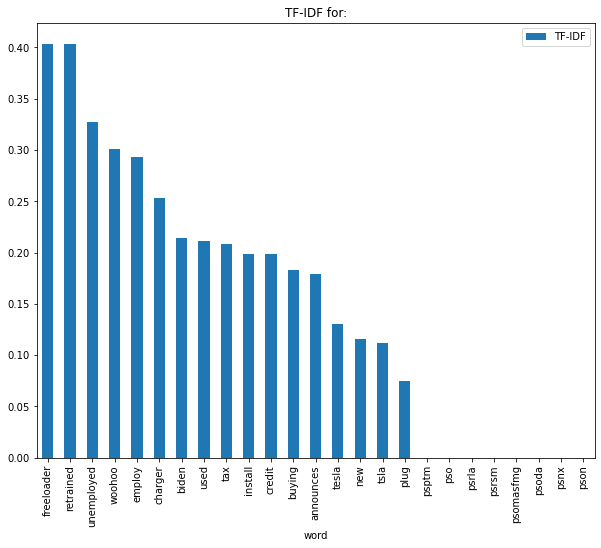

In [12]:
#plot tf-idf resulting charts per company
for name in name_list:
    #print(name)
    gres = res[(res['company'] == name )].set_index('word')
    #plt.title(name)
    ax = gres[(gres['company'] == name)].plot.bar(figsize=(10,8))
    ax.set_title('TF-IDF for:' + name)
    plt.savefig('images/' + name + 'tfidf.png')

In [13]:
# TF-IDF for overall combined data without company seperation
#print(test.head())
tfidf_input = test["Tweet_lemmatized"].apply(listToString).tolist()
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(tfidf_input)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df['company'] = "all"
df['word'] = df.index
print(df[:50])


                                                      TF-IDF company  \
freeloader                                          0.403571     all   
retrained                                           0.403571     all   
unemployed                                          0.326877     all   
woohoo                                              0.300955     all   
employ                                              0.292904     all   
charger                                             0.253488     all   
biden                                               0.214019     all   
used                                                0.211405     all   
tax                                                 0.208118     all   
install                                             0.198963     all   
credit                                              0.198456     all   
buying                                              0.182950     all   
announces                                           0.179365    

<class 'pandas.core.frame.DataFrame'>
Index(['TF-IDF'], dtype='object')


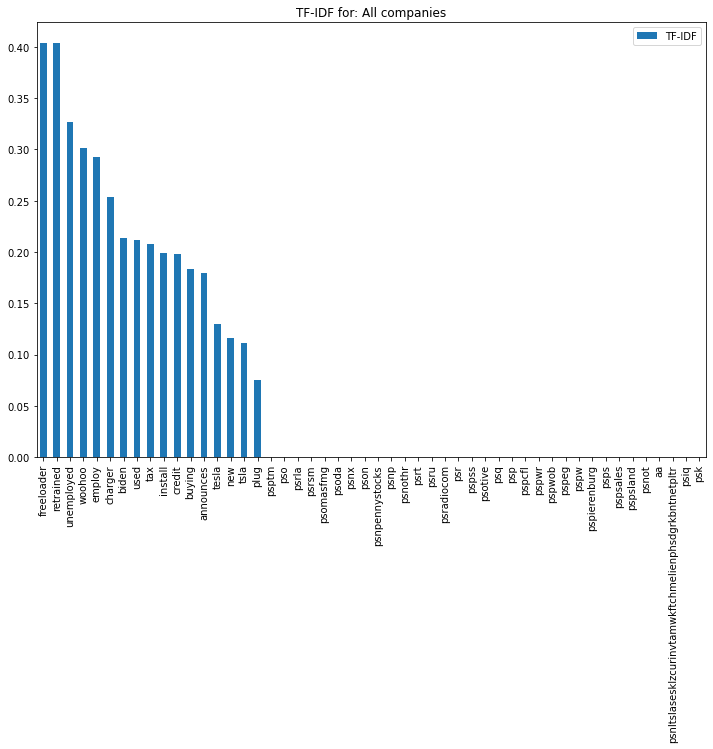

In [14]:
#Save TF-IDF result fr All-companies as image
df2= df[:50]
df3 = df2[['TF-IDF']]
print(type(df3))
print(df3.columns)
#print(df3)
ax = df3.plot.bar(figsize=(12,8))
ax.set_title('TF-IDF for: All companies')
plt.savefig('images/all_tfidf.png')

In [16]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


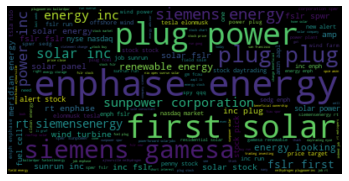

In [17]:
#Merge All data into one group - Testing
text = " ".join(flatten_list(test["Tweet_lemmatized"].apply(listToString).values))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

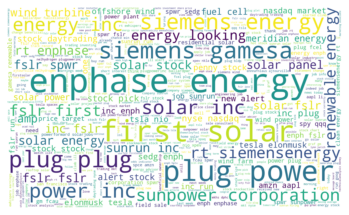

In [18]:
#Overall data wordcloud with customizations - No company split
wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="viridis").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
# Save the image in the img folder:
wordcloud.to_file("images/complete_wordcloud2.png")

In [20]:
## Company wise Word Clouds ##

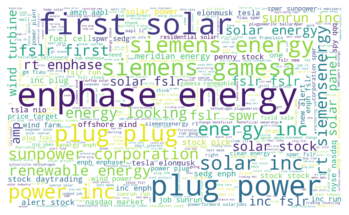

In [21]:
for name in name_list:
    text = " ".join(flatten_list(test[( test['comapany'] == name )]['Tweet_lemmatized'].apply(listToString).values))
    wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="viridis").generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("images/"+name+ "_wordcloud.png")
   

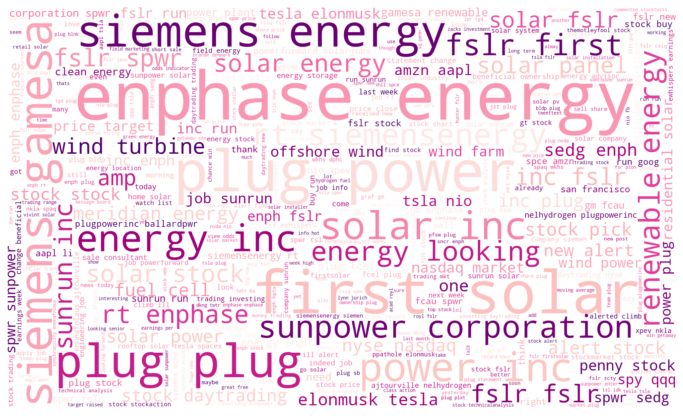

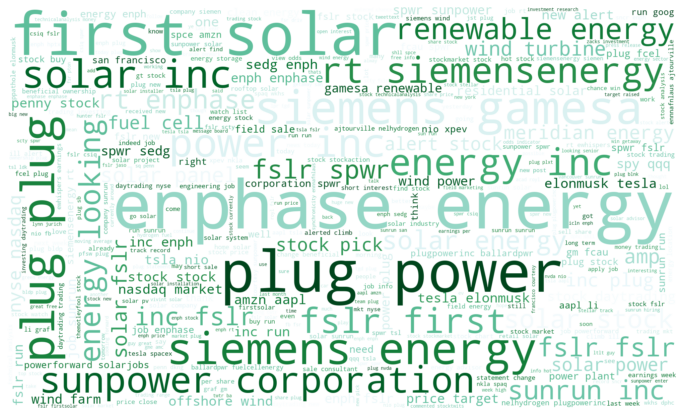

In [22]:
# Generate a word cloud image for sentiments based tweets - change text input to tweet lemmatized for negative sentiment tweets and postive repsectively
wordcloudneg = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="RdPu").generate(text)
plt.figure(figsize=[12,10])
plt.imshow(wordcloudneg, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("images/negative_ssentiment.png", format="png")
#plt.show()

# create coloring from image
wordcloudpos = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="BuGn").generate(text)
plt.figure(figsize=[12,10])
plt.imshow(wordcloudpos, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("images/positive_sentiment.png", format="png")
#plt.show()